# Import all dependencies

In [1]:
# Import system dependencies
import sys
import os

# import json dependencies
import json

# import pandas and plotter
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

# import everything about NLP in thai
import pythainlp
from pythainlp.corpus import stopwords
import deepcut

# os.chdir(os.path.join(os.getcwd(), '../data/processed_except'))
os.getcwd()

Using TensorFlow backend.


'/Users/supakornbabe/Social_Networks_Data_Mining/Proj/notebook'

## อ่านไฟล์ JSON จาก path ที่กำหนด

In [2]:
def read_file(path):
    data = []
    file = open(path, "r")
    count = 0
    for line in file:
        try:
            if (line == '\n'):      # skip empty lines
                continue
            count = count + 1
            data.append(json.loads(line))
            if count % 100 == 0:
                sys.stdout.write('.')
            if count % 7000 == 0:
                sys.stdout.write('\n')
        except Exception as e:
            print(e)
            continue
    print(f"\n{count} line read.")
    df = pd.DataFrame.from_dict(data)
    return df

## ตัดคำและคัดเฉพาะคำที่เกี่ยวข้องแล้วนับจำนวณครั้งที่เกิด

In [3]:
def count_word(df,from_date,to_date):
    words = {}
    count=0
    thai_symbols = 'กขฃคฅฆงจฉชซฌญฎฏฐฑฒณดตถทธนบปผฝพฟภมยรลวศษสหฬอฮฤฦะัาำิีึืุูเแโใไๅ็่้๊๋ฯๆฺ์ํ๎๏๚๛๐๑๒๓๔๕๖๗๘๙฿'
    symbols = "!@#$%^&*()_+=-[]{}\|;:',./<>\"?1234567890qwertyuiopasdfghjklzxcvbnmQWERTYUIOPLKJHGFDSAZXCVBNM"
    thai_stopwords = stopwords.words('thai')
    for title in df['title']:
        count+=1
        for word in pythainlp.word_tokenize(title, engine='deepcut', whitespaces=False):
            if len(word) ==1:
                continue
            if word in symbols:
                continue
            if word in thai_stopwords:
                continue
            if word in thai_symbols:
                continue
            if word not in words:
                words[word] = 1
            else:
                words[word] +=1
                
    dwords = pd.DataFrame(words.items(), columns=['Word', 'Count'])
    dwords.sort_values(by='Count',ascending=False,inplace=True)
    
    dwords=dwords[dwords.Word != '...']
    dwords=dwords[dwords.Word != 'นี้']
    dwords=dwords[dwords.Word != '##']
    dwords=dwords[dwords.Word != '###']
    dwords=dwords[dwords.Word != '####']
    dwords=dwords[dwords.Word != '#####']
    dwords=dwords[dwords.Word != 'quot']
    dwords=dwords[dwords.Word != 'lt']
    dwords=dwords[dwords.Word != 'gt']
    dwords=dwords[dwords.Word != 'OElig']
    dwords=dwords[dwords.Word != 'oelig']
    dwords=dwords[dwords.Word != 'Scaron']
    dwords=dwords[dwords.Word != 'scaron']
    dwords=dwords[dwords.Word != 'Yuml']
    dwords=dwords[dwords.Word != 'circ']
    dwords=dwords[dwords.Word != 'tilde']
    dwords=dwords[dwords.Word != 'ensp']
    dwords=dwords[dwords.Word != 'emsp']
    dwords=dwords[dwords.Word != 'thinsp']
    dwords=dwords[dwords.Word != 'zwnj']
    dwords=dwords[dwords.Word != 'zwj']
    dwords=dwords[dwords.Word != 'lrm']
    dwords=dwords[dwords.Word != 'rlm']
    dwords=dwords[dwords.Word != 'ndash']
    dwords=dwords[dwords.Word != 'mdash']
    dwords=dwords[dwords.Word != 'lsquo']
    dwords=dwords[dwords.Word != 'rsquo']
    dwords=dwords[dwords.Word != 'sbquo']
    dwords=dwords[dwords.Word != 'ldquo']
    dwords=dwords[dwords.Word != 'rdquo']
    dwords=dwords[dwords.Word != 'bdquo']
    dwords=dwords[dwords.Word != 'dagger']
    dwords=dwords[dwords.Word != 'Dagger']
    dwords=dwords[dwords.Word != 'permil']
    dwords=dwords[dwords.Word != 'lsaquo']
    dwords=dwords[dwords.Word != 'rsaquo']
    dwords=dwords[dwords.Word != 'euro']

    file_name = '../data/word_count_'+from_date+'_'+to_date+'.csv'
    dwords.to_csv (file_name, index = None, header=True)    
    return dwords

## ดึงคำและจำนวณที่เกิดเฉพาะจำนวณ n ตัวแรก

In [4]:
def get_word_count_list(df,start=0,stop=10):
    Counts = df.Count[start:stop]
    Counts = list(Counts)
    
    Words = df.Word[start:stop]
    Words = list(Words)
    return Words,Counts

## Plot และสร้างไฟล์รูป

In [5]:
def plot(x,y,from_date,to_date):
    print(x)
    print(y)

    width = 0.6
    fig, ax = plt.subplots()
    plt.bar(x, y, width, alpha=1, color='g')

    # Setting axis labels and ticks
    ax.set_ylabel('จำนวณครั้ง', fontsize=15)
    ax.set_title('จำนวณครั้งของคำที่อยู่ในหัวกระทู้ในช่วงวันที่ '+from_date+' ถึงวันที่ '+to_date, fontsize=15, fontweight='bold')
    ax.set_xticklabels(x,rotation=90)
    plt.grid()

    #set font
    from matplotlib import rcParams
    rcParams['font.family'] = 'sans-serif'
    rcParams['font.sans-serif'] = ['Tahoma']
    rcParams['font.size'] = 22

    # Figure size
    fig.set_size_inches(18.5, 10.5)
    file_name = '../data/word_count_'+from_date+'_'+to_date+'.png'
    fig.savefig(file_name, dpi=80)


### อ่านไฟล์

In [6]:
df = read_file('../data/all_topic_string.json')
df.date = pd.to_datetime(df.date)

......................................................................
......................................................................
......................................................................
......................................................................
......................................................................
......................................................................
......................................................................
......................................................................
......................................................................
......................................................................
......................................................................
......................................................................
......................................................................
......................................................................
......

### คัดเฉพาะวันที่ต้องการ

In [7]:
from_date = '2016-12-27'
to_date = '2017-01-04'
mask = (df['date'] > from_date) & (df['date'] <= to_date)
df_BTW_input_date = df.loc[mask]
print(df_BTW_input_date.shape)

(986, 4)


### ตัดคำและนับคำที่เกิดในหัวข้อกระทู้

In [8]:
word_count = count_word(df_BTW_input_date,from_date,to_date)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


### ตัดเฉพาะ n ตัวแรก และนำไป Plot

['CR', 'เที่ยว', 'ดี', 'รถ', 'สอบถาม', 'คน', 'ไหม', 'คืน', 'พัก', 'ตอน', 'เดินทาง', 'ปี', 'แนะนำ', 'ญี่ปุ่น', 'รีวิว', 'ทำ', 'ตัว', 'ไทย', 'หนาว', 'ซื้อ', 'นั่ง', 'เชียงใหม่', 'ถาม', 'รบกวน', 'เส้นทาง', 'เรื่อง', 'รถไฟ', 'เมือง', 'งาน', 'เดิน']
[234, 156, 95, 87, 70, 67, 63, 61, 59, 47, 46, 45, 44, 41, 39, 37, 34, 33, 31, 30, 30, 28, 28, 27, 27, 27, 27, 26, 25, 25]


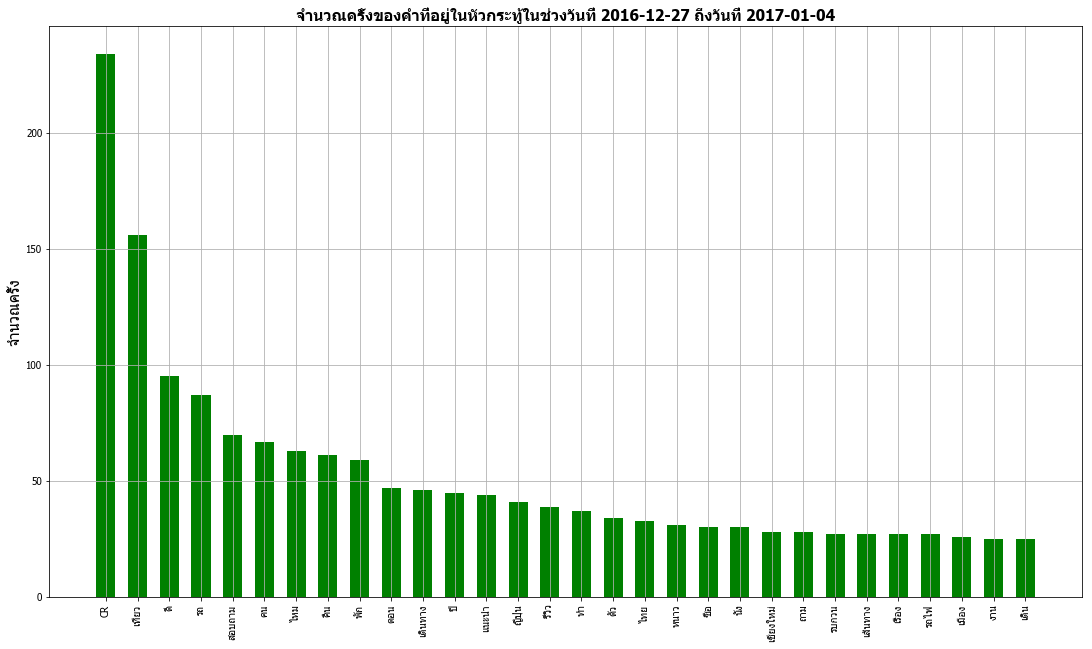

In [9]:
x,y = get_word_count_list(df = word_count,stop=30)
plot(x,y,from_date,to_date)